## Orthogonalization

Some of the most important applications of inner products involve finding and using sets of vectors that are mutually orthogonal.  A set of nonzero vectors $\{U_1, U_2, U_3 ... U_n\}$ is **mutually orthogonal** if $U_i\cdot U_j = 0$ whenever $i \neq j$.  If a set of vectors is mutually orthogonal *and* every vector in the set is a unit vector, we say the set is **orthnormal**.  In other words, every vector in an orthonormal set has magnitude one, and is orthogonal to every other vector in the set.  Orthonormal sets must be linearly independent, so it makes sense to think of them as a basis for some vector subspace.  Any collection of vectors from the standard bases of $\mathbb{R}^n$ are orthonormal sets.  For example, the set of vectors $\{E_1, E_4, E_5\}$ from the standard basis of $\mathbb{R}^5$ forms a orthonormal basis for a subspace of $\mathbb{R}^5$.


$$
\begin{equation}
E_1 = \left[ \begin{array}{r} 1\\0\\0\\0\\0 \end{array}\right] \hspace{0.7cm} 
E_4 = \left[ \begin{array}{r} 0\\0\\0\\1\\0 \end{array}\right] \hspace{0.7cm}
E_5 = \left[ \begin{array}{r} 0\\0\\0\\0\\1 \end{array}\right] \hspace{0.7cm}
\end{equation}
$$

In this section we will focus on a process called orthogonalization.  Given a set of linearly independent vectors  $\{V_1, V_2, V_3 ... V_n\}$, we wish to find an orthonormal set of vectors  $\{U_1, U_2, U_3 ... U_n\}$ such that the span of  $\{U_1, U_2, U_3 ... U_n\}$ is the same as the span of  $\{V_1, V_2, V_3 ... V_n\}$.  In other words, we want both sets to bases for the same subspace.

One of the primary advantages of using orthonormal bases is that the calculation of [coordinate vectors](Bases.ipynb) is greatly simplified.  Recall that if we have a typical basis $\beta = \{V_1, V_2, V_3 ... V_n\}$ for a subspace $\mathcal{V}$, and a vector $X$ in $\mathcal{V}$, the coordinates with respect to $\beta$ are the values of $c_1$, $c_2$,...,$c_n$ such that
$X = c_1V_1 + c_2V_2 + ... c_nV_n$.  This requires that we solve the linear system $A[X]_{\beta}=X$, where $A$ is the matrix that has the basis vectors as its columns, and $[X]_\beta$ is the coordinate vector.  If instead we have an orthonormal basis $\alpha = \{U_1, U_2, U_3 ... U_n\}$, there is a convenient shortcut to solving $X = b_1U_1 + b_2U_2 + ... b_nU_n$.  Let's observe the result of taking the dot product of both sides of the equation with $U_k$.

$$
\begin{eqnarray}
X\cdot U_k & = & (b_1U_1 + b_2U_2 + ... b_nU_n)\cdot U_k \\
 & = & b_1(U_1\cdot U_k) + b_2(U_2\cdot U_k) + ... b_n(U_n\cdot U_k) \\
 & = & b_k 
\end{eqnarray}
$$

All of the products $U_i\cdot U_k$ are zero except for $U_k\cdot U_k$, which is 1.  This means that instead of solving a system to find the coordinates, we can compute each $b_k$ directly as $X\cdot U_k$. 

### Projecting vectors onto vectors

An important step in orthogonalization involves decomposing a vector $U$ into orthogonal components based on the direction of another vector $V$.  Specifically, we want to determine two vectors, $U = U_{||}$ and $U_{\perp}$, such that $U_{||}$ is in the same direction as $V$, $U_{\perp}$ is orthogonal to $V$, and $U = U_{||} + U_{\perp}$.    ($U_{||}$ is read "$U$ parallel", and $U_{\perp}$ is read "$U$ perp".) 

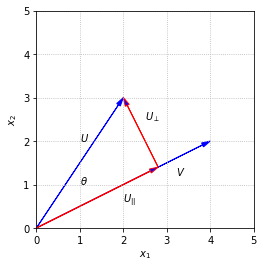

In [21]:
% matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}

ax.arrow(0,0,2,3,fc='b',ec='b',**options)
ax.arrow(0,0,4,2,fc='b',ec='b',**options)
ax.arrow(0,0,2.8,1.4,fc='b',ec='r',**options)
ax.arrow(2.8,1.4,-0.8,1.6,fc='b',ec='r',**options)

ax.text(1,2,'$U$')
ax.text(3.2,1.2,'$V$')
ax.text(2,0.6,'$U_{||}$')
ax.text(2.5,2.5,'$U_{\perp}$')
ax.text(1,1,'$\\theta$')


ax.set_xlim(0,5)
ax.set_xlabel('$x_1$')
ax.set_ylim(0,5)
ax.set_ylabel('$x_2$')
ax.set_aspect('equal')

ax.grid(True,ls=':')

$$
\begin{equation}
U = U_{||} + U_{\perp}
\end{equation}
$$

The vector $U_{||}$ is said to be the **projection** of $U$ in the direction of $V$.

To be more precise, requiring that $U_{||}$ is in the direction of $V$ means that $U_{||} = cV$ for some scalar value $c$.  To make the calculation more direct, we could instead require that $U_{||} = k\hat{V}$ where $\hat{V}$ is the unit vector in the direction of $V$.  Since $|\hat{V}|=1$, it must be that $k = |U_{||}|$.  From the definition of $\cos{\theta}$ we know that $k = |U|\cos{\theta}$.  Finally, we know that $\cos{\theta}$ can be determined by the dot product.

$$
\begin{equation}
\cos{\theta} = \frac{U\cdot V}{|U||V|}
\end{equation}
$$

Combining these equations gives us a formula for  $U_{||}$ in terms of $U$ and $V$.


$$
\begin{equation}
U_{||} = k\hat{V} = (|U|\cos{\theta})\hat{V} = \left(\frac{U\cdot V}{|V|}\right)\hat{V}  = \left(\frac{U\cdot V}{|V|^2}\right){V}= \left(\frac{U\cdot V}{V\cdot V}\right){V}
\end{equation}
$$


In [1]:
import numpy as np
from laguide import DotProduct

U = np.array([[2],[3]])
V = np.array([[4],[2]])

k = DotProduct(U,V)/DotProduct(V,V)

U_parallel = k*V

print(U_parallel)

[[2.8]
 [1.4]]


The easiest way to calculate $U_{\perp}$ is to first find $U_{||}$, then set $U_{\perp} = U = U_{||}$.

In [2]:
U_perp = U - U_parallel
print(U_perp)

[[-0.8]
 [ 1.6]]


If the calculations are correct, we should see that $U_{||}$ and $U_{\perp}$ are orthogonal.

In [3]:
print(DotProduct(U_parallel,U_perp))

4.440892098500626e-16


We see in fact that the computed value of $U_{||}\cdot U_{\perp}$ is not *exactly* zero due to the imprecision of the machine arithmetic.  This is very similar to the some of the results we observed when performing elimination numerically, and we must keep in mind the potential for such errors.  

We also note that the formula derived here for $U_{||}$ works for for vectors of any dimension.  If $U$ and $V$ are vectors in $\mathbb{R}^n$, they still occupy a common plane, and the picture still looks just the same regardless of the fact that the plane sits in a higher dimensional space.

### Gram-Schmidt algorithm

Given a set of linearly independent vectors  $\{V_1, V_2, V_3 ... V_n\}$, the Gram-Schmidt algorithm produces an orthonormal set of vectors $\{U_1, U_2, U_3 ... U_n\}$ such that the span of  $\{U_1, U_2, U_3 ... U_n\}$ is the same as the span of  $\{V_1, V_2, V_3 ... V_n\}$.  The idea is that we will construct the set of $U$ vectors one at a time by adding in a new $V$ vector to the set after first subtracting the components of $V$ that are in the directions of any $U$ vectors already in the set.  The $U$ vectors can be scaled to unit length as part of the process, or they can all be scaled at the end, after all of the projections have been computed.

We write out the individual steps before providing an example.

1. $V_1$ is scaled to unit length and becomes $U_1$.
2. The projection of $V_2$ in the direction of $U_1$ is subtracted from $V_2$.  This vector is scaled to unit length and becomes $U_2$.
3. The projections of $V_3$ in the directions of $U_1$ and $U_2$ are subtracted from $V_3$.  This vector is scaled to unit length and becomes $U_3$.  
4. Continue for all $n$ vectors.

In general, the projections of $V_k$ in the directions of $U_1$, $U_2$, ...$U_{k-1}$ are subtracted from $V_k$ and the vector that results is scaled to unit length to become $U_k$.  


### Example 1

As a first example, we take three vectors from $\mathbb{R}^3$ as the starting set, and use Python to carry out the calculations.

$$
\begin{equation}
V_1 = \left[ \begin{array}{r} 1 \\ 2 \\ 0 \end{array}\right] \hspace{0.7cm} 
V_2 = \left[ \begin{array}{r} 1 \\ 1 \\ 1 \end{array}\right] \hspace{0.7cm}
V_3 = \left[ \begin{array}{r} 3 \\ 0 \\ 1 \end{array}\right] \hspace{0.7cm}
\end{equation}
$$

The first vector, $V_1$ is scaled to unit legth to become $U_1$

In [4]:
from math import sqrt

V_1 = np.array([[1],[2],[0]])
V_2 = np.array([[1],[1],[1]])
V_3 = np.array([[3],[0],[1]])

V_1_length = sqrt(DotProduct(V_1,V_1))
U_1 = V_1/V_1_length
print(U_1)

[[0.4472136 ]
 [0.89442719]
 [0.        ]]


To build $U_2$, we first subtract from $V_2$ the projection of $V_2$ in the direction of $U_1$ and then scale the result.

In [5]:
W_2 = V_2 - (DotProduct(V_2,U_1))*U_1
W_2_length = sqrt(DotProduct(W_2,W_2))
U_2 = W_2/W_2_length
print(U_2)

[[ 0.36514837]
 [-0.18257419]
 [ 0.91287093]]


Here we labeled the intermediate result as $W_2$ in order to break the computation into shorter steps.

In the final step, we subtract from $V_3$ the projections of $V_3$ in the directions of $U_1$ and $U_2$, and then scale the result.

In [6]:
W_3 = V_3 - (DotProduct(V_3,U_1))*U_1 - (DotProduct(V_3,U_2))*U_2
W_3_length = sqrt(DotProduct(W_3,W_3))
U_3 = W_3/W_3_length
print(U_3)

[[ 0.81649658]
 [-0.40824829]
 [-0.40824829]]


We can check now that the $U$ vectors are mutually orthogonal.

In [11]:
print(DotProduct(U_1,U_2))
print(DotProduct(U_1,U_3))
print(DotProduct(U_2,U_3))

5.551115123125783e-17
0.0
-5.551115123125783e-17


After seeing this example, we write down the process in a more formulaic manner.  For each $i = 1, 2, ... n$, we set

$W_i = V_i - (V_i \cdot U_1)U_1 - (V_i\cdot U_2)U_2 ... - (V_i\cdot U_{i-1})U_{i-1}$  
$U_i = W_i/|W_i|$  

It is important to notice here that in general $U_i$ is a linear combination of $\{V_1, V_2, ..., V_{i}\}$.  This means that not only is it true that the span of $\{U_1, U_2, U_3 ... U_n\}$ is equal to the span of $\{V_1, V_2, V_3 ..., V_n\}$, but also it is true that the span of $\{U_1, U_2, ..., U_i\}$ is equal to the span of $\{V_1, V_2, ..., V_i\}$ at every step of the process.  This has important implications for the application presented in the next section. 

### Orthogonal matrices

Another way we could check that the set of vectors $\{U_1, U_2, U_3\}$ is orthonormal is to assemble a matrix with these vectors as the columns and take advantage of the connection between matrix multiplications and dot products.  Suppose that $Q$ is the matrix with $U_1$, $U_2$, and $U_3$ as its columns.  If we compute the matrix product $Q^TQ$, the entries will be the dot products between the rows of $Q^T$ and columns of $Q$, both of which are the set of $U$ vectors.

In [8]:
Q = np.hstack((U_1,U_2,U_3))
print(Q)
I = Q.transpose()@Q
print(Q.transpose()@Q)
print(np.around(I))

[[ 0.4472136   0.36514837  0.81649658]
 [ 0.89442719 -0.18257419 -0.40824829]
 [ 0.          0.91287093 -0.40824829]]
[[ 1.00000000e+00  5.55111512e-17  0.00000000e+00]
 [ 5.55111512e-17  1.00000000e+00 -5.55111512e-17]
 [ 0.00000000e+00 -5.55111512e-17  1.00000000e+00]]
[[ 1.  0.  0.]
 [ 0.  1. -0.]
 [ 0. -0.  1.]]


We see that $U_i\cdot U_j$ is 0 if $i\neq j$ and 1 if $i=j$, which means that $Q^TQ$ is the identity matrix $I$.

The matrix $Q$ is called an **orthogonal matrix**, which means that its columns form a set of orthonormal vectors.  The immediate result is that if $Q$ is an orthogonal matrix, then $Q^TQ = I$.  In the special case that $Q$ is square, this equation implies that $Q^T = Q^{-1}$.

### Exercises